# Problem 3

$F = \frac{1}{2}\int_{0}^{d}\left[K\left(\frac{\partial \theta}{\partial z}\right)^{2}-\frac{\Delta \epsilon}{4\pi}E^{2}\sin^{2}\theta\right]dz$. To minimize the integral Euler-Lagrange equation has to be solved:

$\frac{\partial^2 \theta}{\partial z^2}+\frac{\Delta \epsilon E^{2}}{4\pi K}\sin\theta\cos\theta = 0$, leading to 

\begin{align}
    \theta &\equiv 0 \\
    \left(\frac{\partial \theta}{\partial z}\right)^{2} &=\frac{\Delta \epsilon E^{2}}{8\pi K}\cos2\theta+c, \text{where } c=f(\theta_{m})
\end{align}

$\theta_{m}$ is tilting angle of molecules in the cell center. In the cell center $\frac{\partial \theta}{\partial z} = 0$. This ends up with:

\begin{equation}
\frac{Ed}{2}\sqrt{\frac{\Delta\epsilon}{4\pi K}}=\int^{\theta_{m}}_{0}\frac{d\theta}{\sqrt{\sin^{2}\theta_{m}-\sin^{2}\theta}}
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


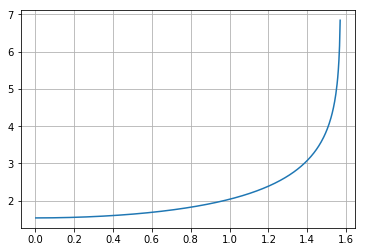

In [13]:
N=1000
theta_m = np.linspace(0, np.pi, N)

def integration(theta_m, N):
    x = np.linspace(0, theta_m-theta_m/N, N)
    fx = 1/(np.sqrt(np.sin(theta_m)*np.sin(theta_m)-np.sin(x)*np.sin(x)))
    return np.sum(fx)*(theta_m)/N

result = np.array([integration(element, N) for element in theta_m])

plt.grid()
plt.plot(theta_m, result)
plt.show()

In [12]:
result[1]

1.5386444218403306

This could be considered as minimum of integral, and approximate is equal to $\frac{\pi}{2}$. So, cutoff energy is:

$\frac{E_{0}d}{2}\sqrt{\frac{\Delta\epsilon}{4\pi K}} = \frac{\pi}{2} \Rightarrow E_{0}=\frac{\pi}{d}\sqrt{\frac{4\pi K}{\Delta\epsilon}}$

To find out the type of behavior of $\theta_{m}$, when $E$ is slightly exceeding $E_{0}$, let's consider $y = \frac{Ed}{2}\sqrt{\frac{\Delta\epsilon}{4\pi K}} = f(\theta_{m})$. We will fit $y$ with linear fit at the small angles and than calculate inverse function.

In [14]:
from sklearn.linear_model import LinearRegression

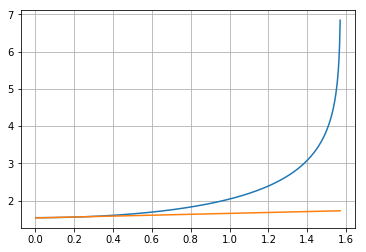

In [20]:
reg = LinearRegression().fit(theta_m[1:100].reshape(-1, 1), result[1:100].reshape(-1, 1))

plt.grid()
plt.plot(theta_m, result)
plt.plot(theta_m[1:500], reg.predict(theta_m[1:500].reshape(-1, 1)))
plt.show()

In [28]:
reg.intercept_

array([1.53210954])

In [24]:
reg.coef_

array([[0.12228374]])

As one can see $y\approx0.122\theta_{m}+1.53\approx0.122\theta_{m}+\frac{\pi}{2}$. Now we will get $\theta_{m}=g(E)$, where $E$ is slightly exceeding $E_0$.

\begin{align}
&\frac{Ed}{2}\sqrt{\frac{\Delta\epsilon}{4\pi K}} = 0.122\theta_{m}+\frac{\pi}{2} \\
&\theta_m = \frac{1}{0.122}\left(\frac{Ed}{2}\sqrt{\frac{\Delta\epsilon}{4\pi K}}-\frac{\pi}{2}\right)
\end{align}